In [1]:
# imports
import networkx as nx  # library to work with graphs
import matplotlib.pyplot as plt  # library to make draws
from itertools import product
from itertools import combinations
import numpy as np

In [2]:
rddas_attractors = [[i for i in range(0, 4)], [i for i in range(4, 7)], [i for i in range(7, 14)],
                    [i for i in range(14, 19)], [i for i in range(19, 31)]]
# rddas_attractors = [np.arange(4), np.arange(4, 7), np.arange(7, 14), np.arange(14, 19), np.arange(19, 31)]

# Coupling Signals
coupling_signals = [[1, 3], [2, 1], [3, 1], [3, 2], [4, 1], [4, 2], [5, 1], [5, 2]]

# Compatible Pairs
compatible_pairs = [[0, 7], [0, 9], [1, 7], [1, 9], [2, 7], [2, 9], [3, 8], [3, 10], [3, 11], [3, 12], [4, 0], [5, 0],
                    [6, 2], [6, 3], [7, 4], [7, 0], [8, 4], [8, 0], [9, 4], [9, 2], [9, 3], [10, 4], [10, 2], [10, 3],
                    [11, 5], [11, 6], [11, 0], [12, 5], [12, 6], [12, 2], [12, 3], [13, 4], [13, 0], [14, 4], [14, 0],
                    [15, 4], [15, 2], [15, 3], [16, 4], [16, 2], [16, 3], [17, 5], [17, 6], [17, 0], [18, 5], [18, 6],
                    [18, 2], [18, 3], [19, 0], [19, 4], [20, 0], [20, 4], [21, 0], [21, 4], [22, 0], [22, 4], [23, 0],
                    [23, 5], [23, 6], [24, 0], [24, 5], [24, 6], [25, 1], [25, 2], [25, 3], [25, 4], [26, 1], [26, 2],
                    [26, 3], [26, 4], [27, 1], [27, 2], [27, 3], [27, 4], [28, 1], [28, 2], [28, 3], [28, 4], [29, 1],
                    [29, 2], [29, 3], [29, 5], [29, 6], [30, 1], [30, 2], [30, 3], [30, 5], [30, 6]]

# # Compatible Pairs by coupling signal
# group_signals_pairs2 = [[[1, 3], [[0, 7], [0, 9], [1, 7], [1, 9], [2, 7], [2, 9], [3, 8], [3, 10], [3, 11], [3, 12]]],
#                     # 2-1
#                     [[2, 1], [[4, 0], [5, 0], [6, 2], [6, 3]]],
#                     # 3-1
#                     [[3, 1],[[7, 0], [8, 0], [9, 2],  [9, 3], [10, 2], [10, 3], [11, 0], [12, 2], [12, 3]]],
#                     # 3-2
#                     [[3, 2],[[7, 4], [8, 4], [9, 4], [10, 4], [11, 5], [11, 6], [12, 5], [12, 6], [13, 4], [13, 0]]],
#                     # 4- 1
#                     [[4, 1],[[14, 0], [15, 2], [15, 3], [16, 2], [16, 3], [17, 0], [18, 2], [18, 3]]],
#                     # 4-2
#                     [[4, 2], [[14, 4], [15, 4], [16, 4], [17, 5], [17, 6], [18, 5], [18, 6]]],
#                     # 5-1
#                     [[5, 1], [[19, 0], [20, 0], [21, 0], [22, 0], [23, 0], [24, 0], [25, 1], [25, 2], [25, 3], [26, 1], [26, 2],
#                     [26, 3], [27, 1], [27, 2], [27, 3], [28, 1], [28, 2], [28, 3], [29, 1],
#                     [29, 2], [29, 3], [30, 1], [30, 2], [30, 3]]],
#                     #5-2
#                     [[5, 2],[[19, 4], [20, 4], [21, 4], [22, 4], [23, 5], [23, 6], [24, 5], [24, 6], [25, 4], [26, 4],
#                     [27, 4], [28, 4], [29, 5], [29, 6], [30, 5], [30, 6]]]]

In [3]:
# rddas_attractors = [[i for i in range(0, 6)], [i for i in range(6, 9)], [i for i in range(9, 15)],
#                     [i for i in range(15, 21)]]
#
# coupling_signals = [[1, 3],[2, 4],[3, 2],[3, 4],[4, 1],[4, 3]]
#
# compatible_pairs = [[0, 9],[1, 9],
# [2, 9],[3, 9],[4, 9],[5, 10],[5, 11],[5, 12],[5, 13],[5, 14],[6, 16],[6, 19],[7, 16],[7, 19],[8, 15],[8, 17],[8, 18],[8, 20],[8, 21],
# [9, 7],[9, 16],[9, 19],[10, 7],[10, 16],[10, 19],[11, 7],[11, 15],[11, 17],[11, 18],[11, 20],[11, 21],[12, 6],[12, 8],[12, 16],[12, 19],
# [13, 6],[13, 8],[13, 16],[13, 19],[14, 6],[14, 8],[14, 15],[14, 17],[14, 18],[14, 20],[14, 21],[15, 2],[15, 3],[15, 9],[16, 2],[16, 3],
# [16, 9],[17, 2],[17, 3],[17, 10],[17, 11],[17, 12],[17, 13],[17, 14],[18, 0],[18, 1],[18, 4],[18, 5],[18, 9],[19, 0],[19, 1],[19, 4],
# [19, 5],[19, 9],[20, 0],[20, 1],[20, 4],[20, 5],[20, 9],[21, 0],[21, 1],[21, 4],[21, 5],[21, 10],[21, 11],[21, 12],[21, 13],[21, 14]]
#
# rddas_attractors

In [4]:
# Generate Groups of pairs by Signal
group_signals_pairs = []
for group in coupling_signals:
    list_pairs = []
    for pair in compatible_pairs:
        if pair[0] in rddas_attractors[group[0]-1] and pair[1] in rddas_attractors[group[1]-1]:
            list_pairs.append(pair)
    group_signals_pairs.append([ group, list_pairs ])
group_signals_pairs

[[[1, 3],
  [[0, 7],
   [0, 9],
   [1, 7],
   [1, 9],
   [2, 7],
   [2, 9],
   [3, 8],
   [3, 10],
   [3, 11],
   [3, 12]]],
 [[2, 1], [[4, 0], [5, 0], [6, 2], [6, 3]]],
 [[3, 1],
  [[7, 0],
   [8, 0],
   [9, 2],
   [9, 3],
   [10, 2],
   [10, 3],
   [11, 0],
   [12, 2],
   [12, 3],
   [13, 0]]],
 [[3, 2],
  [[7, 4],
   [8, 4],
   [9, 4],
   [10, 4],
   [11, 5],
   [11, 6],
   [12, 5],
   [12, 6],
   [13, 4]]],
 [[4, 1],
  [[14, 0], [15, 2], [15, 3], [16, 2], [16, 3], [17, 0], [18, 2], [18, 3]]],
 [[4, 2], [[14, 4], [15, 4], [16, 4], [17, 5], [17, 6], [18, 5], [18, 6]]],
 [[5, 1],
  [[19, 0],
   [20, 0],
   [21, 0],
   [22, 0],
   [23, 0],
   [24, 0],
   [25, 1],
   [25, 2],
   [25, 3],
   [26, 1],
   [26, 2],
   [26, 3],
   [27, 1],
   [27, 2],
   [27, 3],
   [28, 1],
   [28, 2],
   [28, 3],
   [29, 1],
   [29, 2],
   [29, 3],
   [30, 1],
   [30, 2],
   [30, 3]]],
 [[5, 2],
  [[19, 4],
   [20, 4],
   [21, 4],
   [22, 4],
   [23, 5],
   [23, 6],
   [24, 5],
   [24, 6],
   [25, 4],
   [

In [5]:
# Generate a List of signal pairs
list_signal_pairs = []
for group in group_signals_pairs:
    list_signal_pairs.append(group[1])
#list_signal_pairs

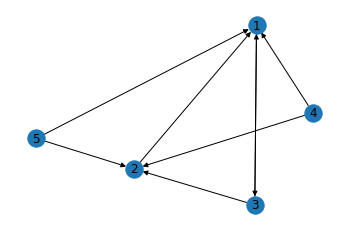

In [6]:
# Create a Graph of the Network of RDDAs
o_graph = nx.DiGraph()
o_graph.add_edges_from(coupling_signals)

# Drawing the graph
nx.draw_networkx(o_graph, pos=nx.spring_layout(o_graph), with_labels=True, font_weight='normal')
plt.axis('off')
# if save_graph:
#     plt.savefig(path_graph + 'adjacency_graph.eps', format='eps')
# if (save_graph):
#    plt.savefig(path_graph + 'adjacency_graph.eps', format='eps')
# Show the Network of RDDAs
plt.show()

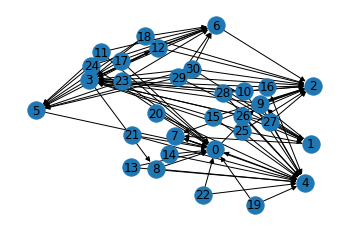

In [7]:
# Create a Graph of the Network of RDDAs
o_graph = nx.DiGraph()
o_graph.add_edges_from(compatible_pairs)

# Drawing the graph
nx.draw_networkx(o_graph, pos=nx.spring_layout(o_graph), with_labels=True, font_weight='normal')
plt.axis('off')
# if save_graph:
#     plt.savefig(path_graph + 'adjacency_graph.eps', format='eps')
# if (save_graph):
#    plt.savefig(path_graph + 'adjacency_graph.eps', format='eps')
# Show the Network of RDDAs
plt.show()

In [8]:
# Manual Method 1-3,   2-1,  3-1,   3-2, 4-1, 4-2, 5-1, 5,2
# valid_fields = [[0,7],[5,0],[8,0], [8,4], [14,0],[14,4],[19,0],[19,4]]

In [9]:
# Enumerate Method
def netMapping(pair):
    elements = list()
    for i in range(2):
        for net, rddas_attractor in enumerate(rddas_attractors):
            check_net = pair[i] in rddas_attractor
            if check_net:
                break
        elements.append(net+1)

    return elements

def is_valid(candidate_field):
    # res = False
    # base = candidate_field[0]
    # for pair in candidate_field[1:]:
    #     if pair[0] in base or pair[1] in base:
    #         base = base + pair
    #         # base = list(set(base))
    #     if pair == candidate_field[-1]:
    #         res = True
    # if len(base) != 2 * len(candidate_field):
    #     res = False
    # print(res)
    #o mesmo atractor tem que ser o mesmo de cada rede, tem que fazer a comprovacao

    res = True
    rdda_dict = {}
    for pair in candidate_field:
        elements = netMapping(pair)
        if not (elements[0] in rdda_dict):
            rdda_dict[elements[0]]= pair[0]
        else:
            if not rdda_dict[elements[0]] == pair[0]:
                return False
        if not (elements[1] in rdda_dict):
            rdda_dict[elements[1]]= pair[1]
        else:
            if not rdda_dict[elements[1]] == pair[1]:
                return False
    return res

In [10]:
# Calculate the number of combinations
cont = 1
for o_signal in list_signal_pairs:
    cont = cont * len(o_signal)
print(cont)

77414400


In [11]:
# Calculate Valid Fields
valid_fields = []
# Cartesian product
for field in product(*list_signal_pairs):
    # print(element)
    if is_valid(field):
        valid_fields.append(field)
        print(field)
len(valid_fields)
print("[[1, 3], [2, 1], [3, 1], [3, 2], [4, 1], [4, 2], [5, 1], [5, 2]]")

([0, 7], [4, 0], [7, 0], [7, 4], [14, 0], [14, 4], [19, 0], [19, 4])
([0, 7], [4, 0], [7, 0], [7, 4], [14, 0], [14, 4], [20, 0], [20, 4])
([0, 7], [4, 0], [7, 0], [7, 4], [14, 0], [14, 4], [21, 0], [21, 4])
([0, 7], [4, 0], [7, 0], [7, 4], [14, 0], [14, 4], [22, 0], [22, 4])
([3, 12], [6, 3], [12, 3], [12, 6], [18, 3], [18, 6], [29, 3], [29, 6])
([3, 12], [6, 3], [12, 3], [12, 6], [18, 3], [18, 6], [30, 3], [30, 6])
[[1, 3],[2, 4],[3, 2],[3, 4],[4, 1],[4, 3]]


In [12]:
# Thinking Method
# comb = combinations(compatible_pairs, len(coupling_signals))
# len(list(comb))
# Print the obtained combinations
# for i in list(comb):
#    print(i)

# # Enumerate Method
# for o_signal in coupling_signals:
#     list_signals_pairs[o_signal] = []
#     for o_pair in compatible_pairs:
#         if o_pair[0] in rddas_attractors[o_signal[0]+1] and o_pair[1] in rddas_attractors[o_signal[1]+1]:
#             list_signals_pairs[o_signal].append()
#
# print(list_signals_pairs)

# # Group attractor fields
# attractor_fields = []
# base_signal = coupling_signals[0]
# for o_attractor in rddas_attractors[base_signal[0]]:
#     # create the list of pairs for every attractor in the rdda
#     list_pairs_for_attractor = list(filter(lambda x: x[0] == o_attractor,  compatible_pairs))
#     # print(list_pairs_for_attractor)
#     for o_pair in list_pairs_for_attractor:
#         for o_signal in coupling_signals[1:]:
#             # Estudiar arboles en Python
#